First of all, we need to import the libraries we need and the load the scaled dataset from the previous notebook.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
car_kick=pd.read_csv('car_kick4.csv')
car_kick.head()

,Age,Mileage,Price,WarrantyCost,price_ratio,IsOnlineSale,Class,Auction_Adesa,Auction_Manheim,Auction_Other,...,State_OK,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV
0,-0.099151,-1.375443,-0.167113,-0.333637,-0.641444,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.099151,1.209000,-1.040398,-0.512020,0.768570,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.684799,-0.032433,0.364368,1.204268,1.121073,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.270448,0.806522,0.546765,1.512542,-0.553318,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.270448,-0.906568,0.993562,0.383359,1.209199,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


The first method that we'll use for our classification problem is Logistic Regression. We need to split our dataset into training and test sets first.

In [3]:
X=car_kick.drop('Class', axis=1)
y=car_kick['Class']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25)

In [4]:
y_train.value_counts(normalize=True)

0    0.90691
1    0.09309
Name: Class, dtype: float64

In [5]:
y_test.value_counts(normalize=True)

0    0.904759
1    0.095241
Name: Class, dtype: float64

As we can see in both training and test datas the distribution of target value is the same. Now let's create a Logistic Regression object with default parameters.

In [6]:
bol=X_train.isna().sum()>0
print(bol[bol==True])

Series([], dtype: bool)


In [15]:
lr=LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
test_bscore=balanced_accuracy_score(y_test, y_pred)
print("The accuracy of the model on the training data is : {}".format(train_score))
print("The accuracy of the model on the test data is : {}".format(test_score))

The accuracy of the model on the training data is : 0.9069706657015904
The accuracy of the model on the test data is : 0.9050003015863441
The accuracy of the model on the test data is : 0.5015499472239814


We have good accuracy result for both training and test datasets. But considering the fact that our dataset is higly imbalanced the accuracy is a poor metric to evaluate the model, so we'll create a confusion matrix for our model.

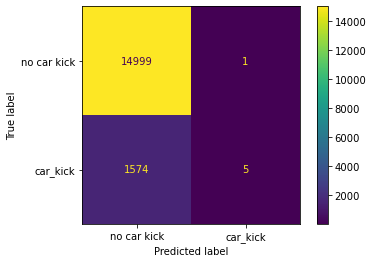

In [8]:
cm=confusion_matrix(y_test, y_pred, labels = lr.classes_)

display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no car kick', 'car_kick'])
display_cm.plot()
plt.show()

In [16]:
print("The accuracy of the model on the test data is : {}".format(test_bscore))

The accuracy of the model on the test data is : 0.5015499472239814


As we can see our model performs poorly on our test data, out of 1565 car kicks only 2 were predicted. On the EDA step of the project we saw that there were no significant linear relationship between the target variable and the features, however we'll try to tune our hyperparamters: we'll use the 'saga' algorithm for solver parameter (which works well on large datsets) with different C values.

In [11]:
clf=LogisticRegression(max_iter = 2000, solver='saga')
params={'C':[ 0.1, 1, 10]}
gs_reg=GridSearchCV(clf, param_grid=params, scoring='balanced_accuracy', cv=5)
gs_reg.fit(X_train, y_train)

print('best score on the train data {}'.format(round(gs_reg.best_score_, 4)))

gs_reg_test=gs_reg.score(X_test, y_test)
print('best score on the test data {}'.format(round(gs_reg_test, 4)))

best score on the train data 0.5004
best score on the test data 0.5015


The model didn't approve at all after changing the parameters. Apparently, the logistic regression is not a good fit for our dataset.The next model that we'll use is Decision Trees with max depth of 5. For the decision trees we don't need to scale the data, so we'll use the unscaled data.

In [52]:
df=pd.read_csv('car_kick5.csv')
df.head()

,Age,Mileage,Price,WarrantyCost,IsOnlineSale,Class,price_ratio,Auction_Adesa,Auction_Manheim,Auction_Other,...,State_OK,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV
0,4,51954,7062.0,1086.0,0,0,0.68,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,89127,4783.0,983.0,0,0,0.84,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,71271,8449.0,1974.0,0,0,0.88,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,83338,8925.0,2152.0,0,0,0.69,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,58698,10091.0,1500.0,0,0,0.89,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
X=df.drop('Class', axis=1)
y=df['Class']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25)

In [54]:
dtm = DecisionTreeClassifier(max_depth= 5)

dtm.fit(X_train, y_train)
y_pred=dtm.predict(X_test)
y_pred=pd.Series(y_pred)


print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred))
print('Recall score' , metrics.recall_score(y_test,y_pred))

Accuracy: 0.9075857916917519
Balanced accuracy: 0.5002925654031687
Precision score 0.5
Recall score 0.0006514657980456026


The Decision tree Classifier also performs poorly on our data, however we can try to tune our hyperparameters: changing max depth and criterion for it.

In [55]:
dt=DecisionTreeClassifier()
params={'max_depth': [10, 15, 25, 35, None], 'criterion':['gini', 'entropy']}

gs_dt=GridSearchCV(dt, param_grid=params, scoring='balanced_accuracy', cv=5)
gs_dt.fit(X_train, y_train)

print('best score on the train data {}'.format(round(gs_dt.best_score_, 4)))
print('params for the best score {}'.format(gs_dt.best_params_))
gs_dt_test=gs_dt.score(X_test, y_test)
print('best score on the test data {}'.format(round(gs_dt_test, 4)))

best score on the train data 0.5287
params for the best score {'criterion': 'gini', 'max_depth': None}
best score on the test data 0.525
